### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

# Table of contents
1.  [Introduction](#introduction)
2.  [Criterias](#criterias)
    1.  [Import Libraries](#importlibs)
    2.  [Read DataFrames](#readdataframes)
    3.  [Shape, info and Describe](#shapeinfodescribe)
    4.  [Number of Movies per Genre](#moviespergenre)
    5.  [Number Of Movies having more than 1 Genre](#moviesmorethan1genre)
    6.  [Unknown Genre](#unknowngenre)
    7.  [Univariate Plots](#univariate)
        * [Age](#univariate-age)
        * [Gender](#univariate-gender)
        * [Occupation](#univariate-occupation)
        * [Rating](#univariate-rating)
        * [Release Year](#univariate-releaseyear)<br><br>
    8.  [Genre Popularity over Years](#genrepopularity)
    9.  [Top 25 Movies](#top25movies)
    10. [Gender Distribution across different Genres](#gendergenredist)
3. [Conclusion](#conclusion)

<a name="introduction"></a>
## Introduction
The dataset we are going to be analysing today consists of MovieLens data. We are provided with lists of users, movies and user movie ratings. Using this we will be trying to find out some interesting statistical information and the inferences we can make based on that.

<a name="criterias"></a>
## Criterias
<a name="importlibs"></a>
### 1. Import the necessary packages - 2.5 marks

In [1]:
# Ignore any warnings that might clutter the notebook
import warnings
warnings.filterwarnings('ignore')

# Import pandas and numpy for reading data and any manipulation that might be required
import pandas as pd
import numpy as np

# Import matplotlib and seaborn for plotting
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update seaborn default style
sns.set_style(style='darkgrid')
sns.set_palette("muted")

<a name="readdataframes"></a>
### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# Read data from CSV using pandas "read_csv" function
movie_user_ratings = pd.read_csv("Data.csv")
movies = pd.read_csv("item.csv")
users = pd.read_csv("user.csv")

print("\n")
print("(HEAD)Users")
print("-----------")
display(HTML(users.head().to_html()))

print("\n")
print("(HEAD) Movies")
print("-------------")
display(HTML(movies.head().to_html()))

print("\n")
print("(HEAD) Users Movie Ratings")
print("--------------------------")
display(HTML(movie_user_ratings.head().to_html()))



(HEAD)Users
-----------


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213




(HEAD) Movies
-------------


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0




(HEAD) Users Movie Ratings
--------------------------


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


##### Observation:

* The *timestamp* in the **movie_user_ratings** dataframe are in epoch time (number of seconds from 00:00:00 UTC on 1 January 1970). This might need some special parsing. But it is expected to be in numeric format, which makes it easy for quick comparisons

* The *genre* in the **movies** dataframe are numeric and have their own columns. A 1 in the column denotes that the move is of that genre and a movie can have multiple genres. This means we dont need to encode this categorical data as it is already in numerical format.

<a name="shapeinfodescribe"></a>
### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
# info() - Gives the details on how many non-null values exists in the columns of the dataframe
# shape - Gives the shape of the data frame (rows, columns)
# describe() - Give the statistical summary (including the 5 point summary, quartiles, min, max)
# Using these we can find if there are any missing values in the dataframes

print("Describing users")
print("****************")
print("\n")
print("Users -- Info")
print(users.info())
print("\n")
print("Users -- Shape")
print(users.shape)
print("\n")
print("Users -- Describe")
display(HTML(users.describe().to_html()))

Describing users
****************


Users -- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


Users -- Shape
(943, 5)


Users -- Describe


,user id,age
count,943.00,943.00
mean,472.00,34.05
std,272.36,12.19
min,1.00,7.00
25%,236.50,25.00
50%,472.00,31.00
75%,707.50,43.00
max,943.00,73.00


In [4]:
print("Describing movies")
print("*****************")
print("\n")
print("Movies -- Info")
print(movies.info())
print("\n")
print("Movies -- Shape")
print(movies.shape)
print("\n")
print("Movies -- Describe")
display(HTML(movies.describe().to_html()))

Describing movies
*****************


Movies -- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,"1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00"
mean,841.84,0.00,0.15,0.08,0.02,0.07,0.30,0.06,0.03,0.43,0.01,0.01,0.05,0.03,0.04,0.15,0.06,0.15,0.04,0.02
std,485.64,0.02,0.36,0.27,0.16,0.26,0.46,0.25,0.17,0.50,0.11,0.12,0.23,0.18,0.19,0.35,0.24,0.36,0.20,0.13
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,422.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,842.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"1,262.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"1,682.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [5]:
print("Describing movie_user_ratings")
print("*****************************")
print("\n")
print("Movie User Ratings -- Info")
print(movie_user_ratings.info())
print("\n")
print("Movie User Ratings -- Shape")
print(movie_user_ratings.shape)
print("\n")
print("Movie User Ratings -- Describe")
display(HTML(movie_user_ratings.describe().to_html()))

Describing movie_user_ratings
*****************************


Movie User Ratings -- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


Movie User Ratings -- Shape
(100000, 4)


Movie User Ratings -- Describe


,user id,movie id,rating,timestamp
count,"100,000.00","100,000.00","100,000.00","100,000.00"
mean,462.48,425.53,3.53,"883,528,851.49"
std,266.61,330.80,1.13,"5,343,856.19"
min,1.00,1.00,1.00,"874,724,710.00"
25%,254.00,175.00,3.00,"879,448,709.50"
50%,447.00,322.00,4.00,"882,826,944.00"
75%,682.00,631.00,4.00,"888,259,984.00"
max,943.00,"1,682.00",5.00,"893,286,638.00"


##### Observation:

On looking at the info, shape and describe information, we understand the following:
* There are **943 Users** who provided ratings
* There are **1681 Movies** in the dataset
* There are **100,000 User Movie Ratings** that have been recorded in the dataset
* From all the dataframe information, looks like there are *no missing values* in the likes of *NaN* or *Empty* values.
* At this point, we dont know if all the values are valid though. Data like unexpected wrong values or missing information which have been recorded in non-standard formats are not accounted for here.
* Movies could have duplicate title. We are not accounting for them here. We will handle where required
* All the numeric columns in the dataframes are valid numbers based on the *count* parameter in the output of *describe()*


<a name="moviespergenre"></a>
### 4. Find the number of movies per genre using the item data - 5 marks

In [6]:
print("\nNumber of Movies per genre")
print("**************************")

# Remove the extraneous columns from the movie dataframe that are not required for this criteria.
# Create a dataframe with just the genres
movies_only_genre = movies[movies.columns.difference(["movie id", "movie title", "release date"])]

# Find the sum of all the columns (genre) in this new dataframe - this will be the number of movies per genre
genre_sum = movies_only_genre.sum().sort_values(ascending=False).reset_index()

# Rename the columns in place to make it more readable
genre_sum.rename(columns = {"index":"genre",0:"number of movies"}, inplace = True)

display(HTML(genre_sum.to_html()))


Number of Movies per genre
**************************


,genre,number of movies
0,Drama,725
1,Comedy,505
2,Action,251
3,Thriller,251
4,Romance,247
5,Adventure,135
6,Childrens,122
7,Crime,109
8,Sci-Fi,101
9,Horror,92


##### Observation

* *Drama* is the genre with the most number of movies (**725**), followed by *Comedy* (**505**)
* Movies have more than one genre and are being counted again for each of their genre. So essentially there could be duplicates in these counts
* **1** movie seems to have **unknown** genre and this might need cleanup later.
* Discounting *unknown*, **Fantasy** genre has the least number of movies (**22**)

<a name="moviesmorethan1genre"></a>
### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
print("\nMovies that have more than one genre")
print("************************************")

# Make a copy of the movies dataframe
movies_with_genre_count = movies.copy()

# Add a new column which is the sum of all the genre column / row (axis=1)
# movies_only_genre dataframe was already defined in the criteria #4 and is being reused here.
movies_with_genre_count["genre_count"] = movies_only_genre.sum(axis=1)

# Filter only those movies that have "genre_count" > 1. Sort them in descending order
movies_more_than_one_genre = movies_with_genre_count.loc[movies_with_genre_count["genre_count"] > 1, ["movie id", "movie title", "genre_count"]].sort_values(["genre_count"], ascending=False)

display(HTML(movies_more_than_one_genre.to_html()))
print("Total number of movies in the dataset = ", len(movies))
print("Number of movies with more than 1 genre = ", len(movies_more_than_one_genre))


Movies that have more than one genre
************************************


,movie id,movie title,genre_count
171,172,"Empire Strikes Back, The",6
558,560,"Kid in King Arthur's Court, A",6
424,426,"Transformers: The Movie, The",6
753,755,Jumanji,5
16,17,From Dusk Till Dawn,5
818,820,Space Jam,5
100,101,Heavy Metal,5
1074,1076,"Pagemaster, The",5
180,181,Return of the Jedi,5
20,21,Muppet Treasure Island,5


Total number of movies in the dataset =  1681
Number of movies with more than 1 genre =  849


##### Observation:
* Of the **1681** movies studied, **849** of those are movies which have more than one genre 
* The movie "*Empire Strikes Back, The*", "*Kid in King Arthur's Court, A*", "*Transformers: The Movie, The*" all top the list with 6 genres each.

<a name="unknowngenre"></a>
### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
print("Before delete, shape = ", movies.shape)
print("\nMovie with unknown genre")
print("************************")
display(HTML(movies[movies["unknown"] >= 1].to_html()))

# Drop the movie with "unknown" genre inplace.
movies.drop(movies[movies["unknown"] >= 1].index, inplace=True)
print("\nAfter delete, shape = ", movies.shape)

Before delete, shape =  (1681, 22)

Movie with unknown genre
************************


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



After delete, shape =  (1680, 22)


<a name="univariate"></a>
### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

<a name="univariate-age"></a>
#### Age Plot

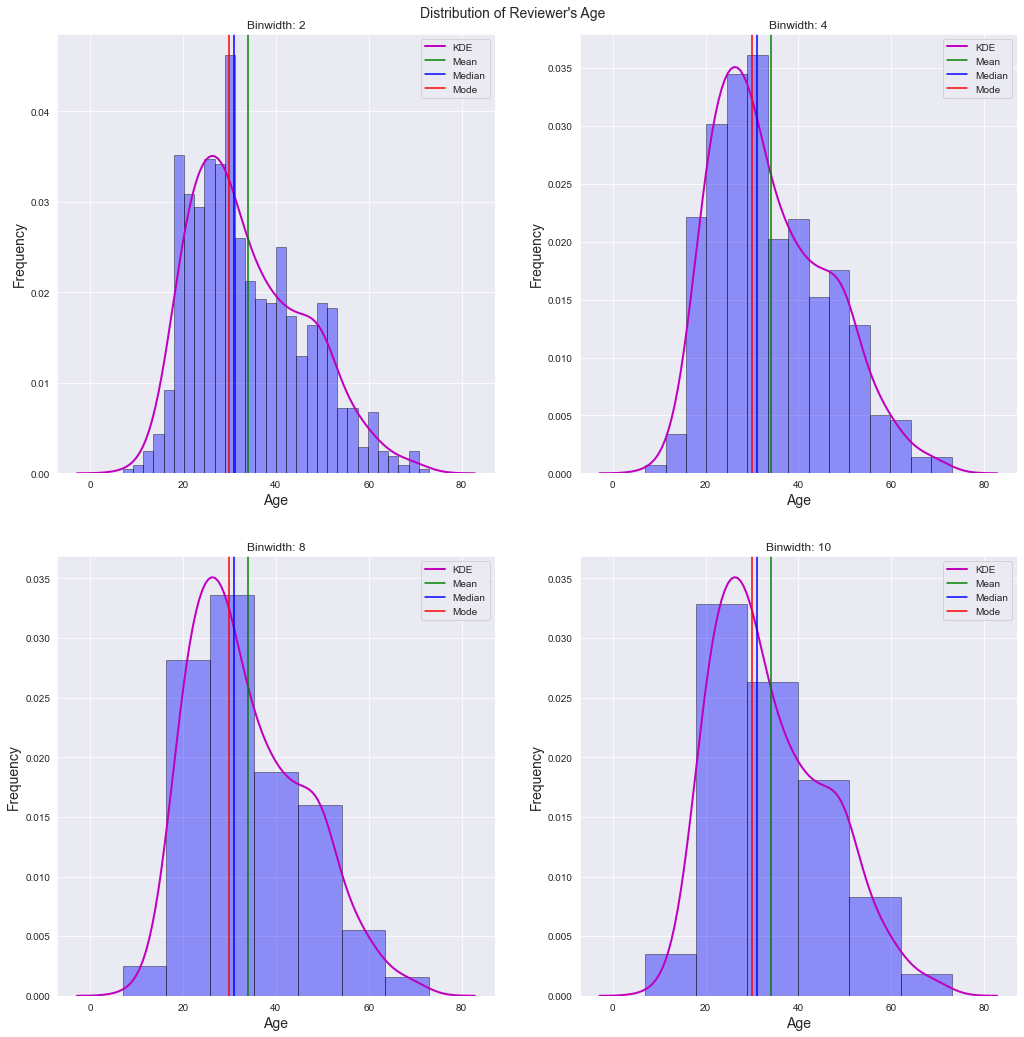


The skewness score =  0.6053815216208658
The kurtosis =  -0.30742700745833496


In [9]:
# Number of unique ages in the dataset
# Used to roughly calculate the bin width
age_uniq_count = users["age"].nunique()

# Mean of ages
age_mean=users["age"].mean()

# Median of ages
age_median=users["age"].median()

# Mode of ages
age_mode=users["age"].mode()

# Try to plot distribution of age for various bin widths like 2, 4, 8, 10
# See which of the plot looks more smoother and the KDE curve seems more approximate of the data

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), squeeze=False)
for i, binwidth in enumerate([2, 4, 8, 10]):
    ax_dist = axes[i//2,i%2]
    ax_dist.set_title("Binwidth: %d" % binwidth)
    
    # Create a distplot of age, along with KDE
    sns.distplot(users["age"], ax=ax_dist, bins=int(age_uniq_count/binwidth), color="blue", kde_kws={"color": "m", "lw": 2, "label": "KDE"}, hist_kws={'edgecolor':'black'})
    ax_dist.set_xlabel("Age", fontsize=14)
    ax_dist.set_ylabel("Frequency", fontsize=14)
    
    # Draw the lines matching the mean, median and mode to find out if the data is skewed
    ax_dist.axvline(age_mean,color='green',label='Mean')
    ax_dist.axvline(age_median,color='blue',label='Median')
    ax_dist.axvline(age_mode[0],color='red',label='Mode')
    ax_dist.legend()

fig.suptitle("Distribution of Reviewer's Age", fontsize=14)
fig.tight_layout(pad=3.5)
plt.show();

# Calculate the skewness score (to identify if it is postive or negative skew)
print("\nThe skewness score = ", users["age"].skew())

# Calculate the kurtosis, to figure out if there are any extreme outliers
print("The kurtosis = ", users["age"].kurtosis())

##### Observation
From the "age" distribution, we can observe the following:
* We attempted to plot the age using different bin widths (2, 4, 8, 10)
* With a width of 4, we seem to get a good histogram with a smooth density curve (KDE)
    * The data looks to be postively skewed (More frequent values are low and tail towards high values) and we can see that from the skewness score of 0.6 and also *Mode< Median< Mean*
    * The data has a negative kurtosis of -0.3, meaning the outliers are not as extreme as normal distribution (lesser number of outliers)
    * Users in the age range **20-32** seem to be more frequent reviewers
    * Reviewers **>60** are very less frequent


<a name="univariate-gender"></a>
#### Gender Plot

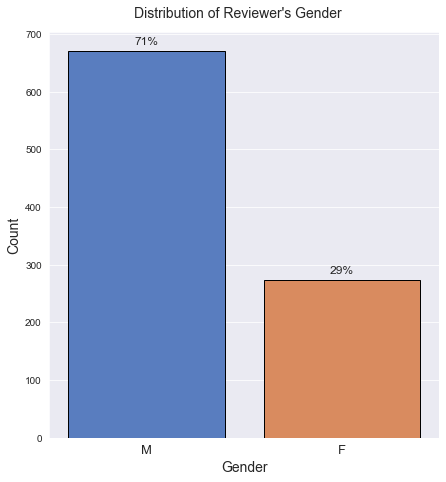

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7), squeeze=False)
# Create a count plot for the gender, to get a sense of gender distribution of the reviewers
sns.countplot(users["gender"], ax=axes[0,0], edgecolor="black")

fig.suptitle("Distribution of Reviewer's Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=13)

gender_total = len(users["gender"])
for p in axes[0,0].patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/gender_total)
    x = p.get_x() + 0.4
    y = p.get_y() + p.get_height()
    axes[0,0].annotate(percentage, (x,y), size = 12, ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.subplots_adjust(hspace = 0.45, top=0.93)
plt.show();

##### Observation
* From the *gender* distribution plot, we observe that the majority of the reviewers are **male** (71%)
* May be **female** dont watch as many movies as their male counterparts or submit a rating
* It will be interesting to find out if there is a specific genre that *male* prefer over *female* and if those genres have higher number of releases across years, to understand these numbers

<a name="univariate-occupation"></a>
#### Occupation Plot

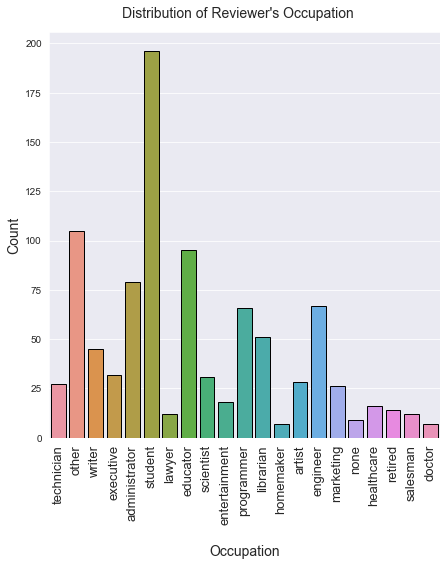

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7), squeeze=False)
# Create a count plot of the distribution of the occupation of the reviewers
sns.countplot(users["occupation"], ax=axes[0,0], edgecolor="black")

fig.suptitle("Distribution of Reviewer's Occupation", fontsize=14)
plt.xticks(rotation=90, fontsize=13)
plt.xlabel("Occupation", labelpad=20, fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.subplots_adjust(hspace = 0.45, top=0.93)
plt.show();

##### Observation
From the *occupation* distribution above, we observe that:
* majority of the reviewers are **student**
* whereas **doctor** and **homemaker** are very few. This could be because they dont have enough time to watch movies or rate it after watching one.

<a name="univariate-rating"></a>
#### Rating Plot

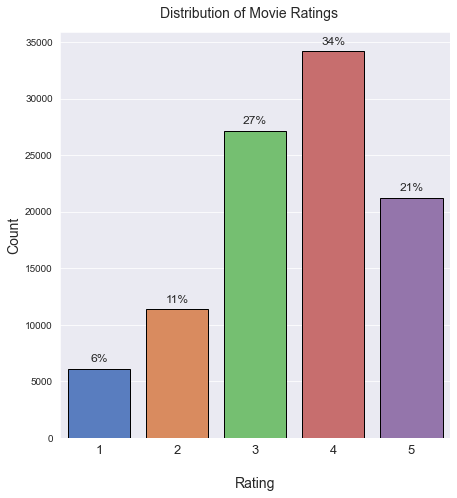

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7), squeeze=False)
# Create a count plot of the ratings for the movies, to get a sense of the quality of the movies that viewers rate
sns.countplot(movie_user_ratings["rating"], ax=axes[0,0], edgecolor="black")
fig.suptitle("Distribution of Movie Ratings", fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel("Rating", labelpad=20, fontsize=14)
plt.ylabel("Count", fontsize=14)

rating_total = len(movie_user_ratings["rating"])
for p in axes[0,0].patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/rating_total)
    x = p.get_x() + 0.4
    y = p.get_y() + p.get_height()
    axes[0,0].annotate(percentage, (x,y), size = 12, ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.subplots_adjust(hspace = 0.45, top=0.93)
plt.show();

##### Observation
From the *ratings* distribution above
* We can see that the majority of the movie ratings is at 4, followed closely by 3. 
* About **61%** of the ratings are distributed between 3 and 4
* Only about **6%** of the ratings are at 1


<a name="univariate-releaseyear"></a>
#### Release Year Plot

Any movie with invalid release year? =  False


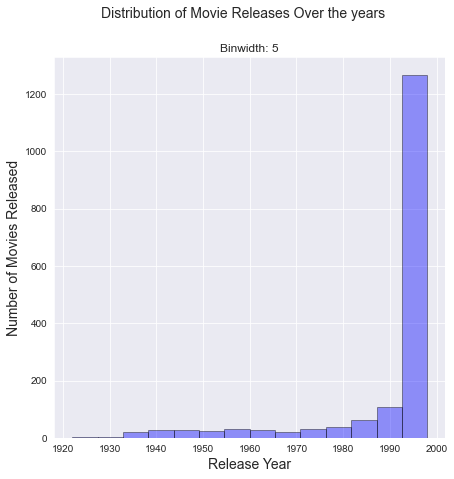

In [13]:
# Make a copy of the movies dataframe
movies_with_release_year = movies.copy()

# Get the last 4 characters of the "release date" string to get the "release year"
movies_with_release_year["release_year"] = movies_with_release_year["release date"].str[-4:]

# Check if there are any rows with invalid release year
print("Any movie with invalid release year? = ", (movies_with_release_year["release_year"].str.len() < 4).any())

# Get a count of unique years, to get a rough bin width
years_uniq_count = movies_with_release_year["release_year"].nunique()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7), squeeze=False)
# create a dist plot of the release year, without the KDE to get the actual distribution
sns.distplot(movies_with_release_year["release_year"], ax=axes[0,0], bins=int(years_uniq_count/5), color="blue", kde=False, hist_kws={'edgecolor':'black'})
axes[0,0].set_title("Binwidth: %d" % 5)
fig.suptitle("Distribution of Movie Releases Over the years", fontsize=14)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Movies Released", fontsize=14)
plt.show();

##### Observation
From the *release year* distribution above, we notice the following:
* Most movies released are from the years **1995-2000**
* This mean there has been a sudden surge in the release of movies form the 90s, much to the excitement of the movie aficionados.
* It will be interesting to see if any specific genre has caught the attention of the movie makers
* From **1920-1980** less than 50 movies were being released every 5 years

<a name="genrepopularity"></a>
### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

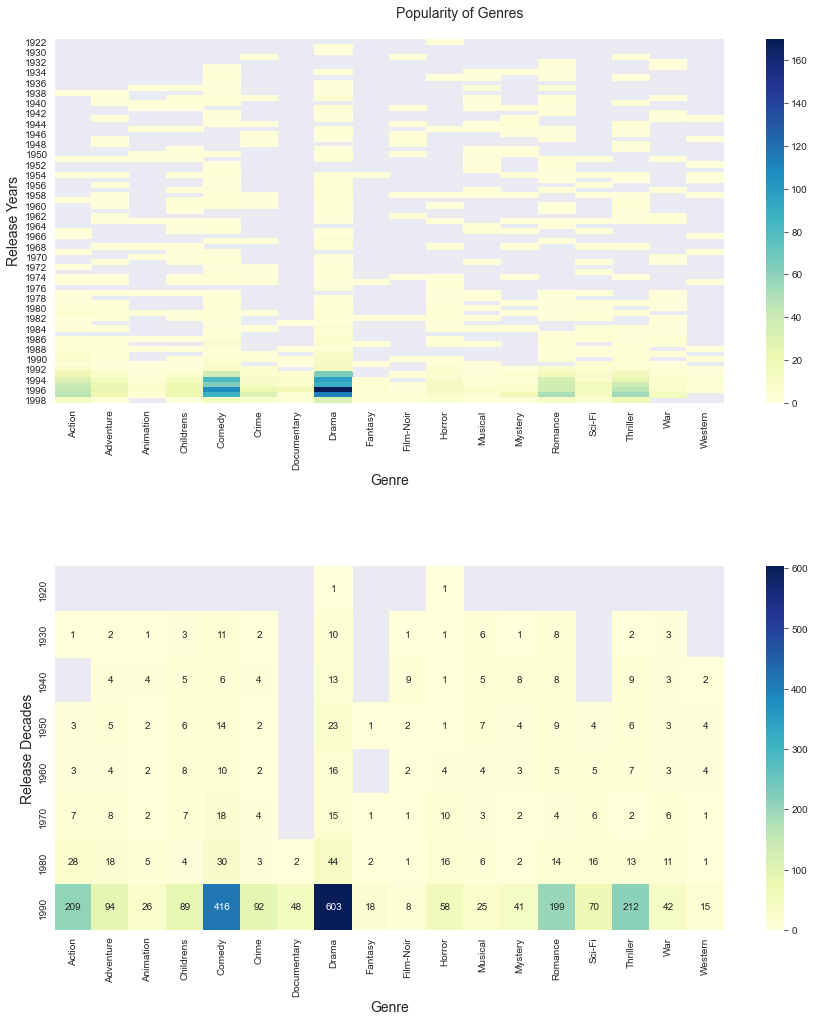

In [14]:
# Get a dataframe with only the release year and the genres (ignoring unknown)
movies_release_with_genre = movies[movies.columns.difference(["movie id", "movie title", "unknown"])]

# Find the release year from the release date
movies_release_with_genre["release_year"] = movies_release_with_genre["release date"].str[-4:]

# Find the release decade from the release year (found above)
movies_release_with_genre["release_decade"] = movies_release_with_genre["release_year"].apply(lambda x: int(x)//10*10)

# Drop the release data from the dataframe, as this will not be required anymore
movies_release_with_genre.drop(["release date"], axis=1, inplace=True)

# Create a new dataframe, with only the release year
movie_year_with_genre = movies_release_with_genre.copy()
movie_year_with_genre.drop(["release_decade"], axis=1, inplace=True)

# Create a new dataframe, with only the release decade
movie_decade_with_genre = movies_release_with_genre.copy()
movie_decade_with_genre.drop(["release_year"], axis=1, inplace=True)

# For each year, calculate the sum of genres
movies_genre_per_year = movie_year_with_genre.groupby("release_year").sum()

# For each decade, calculate the sum of genres
movies_genre_per_decade = movie_decade_with_genre.groupby("release_decade").sum()

# Mark genre with 0 count as NaN - To help with masking them in the heatmap
movies_genre_per_year[movies_genre_per_year == 0] = np.nan
movies_genre_per_decade[movies_genre_per_decade == 0] = np.nan

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

# Create a heatmap for the year wise distribution of genre
sns.heatmap(movies_genre_per_year, ax=ax1, mask=movies_genre_per_year.isnull(), cmap="YlGnBu", vmin=0)
ax1.set_xlabel("Genre", fontsize=14)
ax1.set_ylabel("Release Years", fontsize=14)

# Create a heatmap for decade wise distribution of genre
sns.heatmap(movies_genre_per_decade, ax=ax2, mask=movies_genre_per_decade.isnull(), cmap='YlGnBu', vmin=0, annot=True, fmt=".0f")
ax2.set_xlabel("Genre", fontsize=14)
ax2.set_ylabel("Release Decades", fontsize=14)

fig.suptitle("Popularity of Genres", fontsize=14)
plt.yticks(fontsize=10, va="center")
plt.subplots_adjust(hspace = 0.45, top=0.95)
plt.show();

##### Observation
* First we try to observe the popularity over all the years in the data set. 
    * As we can observe, the map is very cluttered, making it hard to make clear observations
    * Also because of this cluttering, its difficult to annotate these plots
    * Also the missing values for some of the genres on some years (no movies released in that genre), gives a very sparse heatmap
    * These missing values are also on contiguous years for some genres, which shows that may be movie makers were experimenting with audience reaction to these genres to gauge public interest
    * This trend of missing genres seems to happen until late 1980s and early 1990s.
    * After this point, we see that movies of all genre are being released on all years (though not in equal numbers)
* So, we try to plot the same heatmap using decade of when the movie was released, to see if it makes it easier to observe
    * Once the data is grouped on a decade level, missing data still exists, but doesnt make the heatmap sparse
    * This allows us to make some clear observations
        * **Drama** and **Horror** genre movies were the very first genres to have been released and have always been released
        * **1930s** saw the emergence of a wide variety of genres
        * **1950s** saw the emergence of *Fantasy* and *Sci-Fi* movies
        * **1980s** saw the emergence of *Documentary* movies
        * After **1980s** all genre of movies are being released
        * In the **1990s**, we see that *Drama* genre becoming highly popular, followed by *Comedy* and eventually by *Action*, *Romance* and *Thriller*
        * No genre lost popularity across decades (ignoring slight fluctation within the same range)
        * *Animation*, *Fantasy*, *Film Noir* and *Western* have somewhat remained the same in popularity througout. They were not affected positively by the sudden surge in movie releases in the **1990s** (If more recent dataset is retrieved, we might actually see genres like *Animation* and *Fantasy* surging, based on what we see in the real world today)

<a name="top25movies"></a>
### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [15]:
# First lets check if there are any movies with duplicated title. This might make joining on "movie title" unreliable
duplicated_movie_title_list = movies[movies.duplicated(["movie title"])]["movie title"].sort_values().unique().tolist()
print("\nNumber of movies with duplicated title = ", len(duplicated_movie_title_list))
print("Since we have duplicated titles, better to use \"movie id\" for any purpose")
print("\n---------------")

# Since we have duplicated title, we will use "movie id" for all future purposes

# Merge movies with movie_user_rating dataframe
movie_user_ratings_with_name = movie_user_ratings.merge(movies[["movie id", "movie title"]], on="movie id", how="left")

# Check if the merge left any movie ratings without any movie details (movie id or movie title)
# We can clean those up before calculating

# Get list of movie id, that dont have a movie title, after the merge (can have duplicates)
missing_movie_ids_duplicate = movie_user_ratings_with_name[movie_user_ratings_with_name["movie title"].isnull()]["movie id"].tolist()

# Get unique list of movie id that dont have a movie title after the merge
missing_movie_ids = np.unique(missing_movie_ids_duplicate)

print("\nAny rated movie without movie title?", (movie_user_ratings_with_name["movie title"].isnull()).any())
print("\nRated movie IDs without title =", missing_movie_ids)
print("Total rows in the dataset", len(movie_user_ratings_with_name))
print("Number of affected rows = ", len(missing_movie_ids_duplicate))

# # 267 is missing in the dataset, 1373 was removed because it was of "unknown" genre

# Drop those rows with the movie id that dont have a movie title
movie_user_ratings_with_name.drop(movie_user_ratings_with_name[movie_user_ratings_with_name["movie id"].isin(missing_movie_ids)].index, inplace=True)

print("\nAny rated movie without movie title?", (movie_user_ratings_with_name["movie title"].isnull()).any())
print("\n---------------")

movie_ratings_total_avg = movie_user_ratings_with_name.groupby(["movie id", "movie title"])["rating"].agg(['count','mean']).sort_values(by=["mean"], ascending=False).reset_index()
movie_100_ratings_total_avg = movie_ratings_total_avg[movie_ratings_total_avg["count"] > 100]

print("\nNumber of movies with greater than 100 ratings: ", len(movie_100_ratings_total_avg))
print("\n---------------")

movie_100_ratings_total_avg = movie_100_ratings_total_avg.head(25).reset_index()
movie_100_ratings_total_avg.rename(columns= {"count": "rating count", "mean": "rating"}, inplace = True)

print("\nTop 25 Movies by average rating with more than 100 ratings")
print("**********************************************************")
display(HTML(movie_100_ratings_total_avg.to_html()))



Number of movies with duplicated title =  22
Since we have duplicated titles, better to use "movie id" for any purpose

---------------

Any rated movie without movie title? True

Rated movie IDs without title = [ 267 1373]
Total rows in the dataset 100000
Number of affected rows =  10

Any rated movie without movie title? False

---------------

Number of movies with greater than 100 ratings:  334

---------------

Top 25 Movies by average rating with more than 100 ratings
**********************************************************


,index,movie id,movie title,rating count,rating
0,15,408,"Close Shave, A",112,4.49
1,16,318,Schindler's List,298,4.47
2,17,169,"Wrong Trousers, The",118,4.47
3,18,483,Casablanca,243,4.46
4,20,64,"Shawshank Redemption, The",283,4.45
5,21,603,Rear Window,209,4.39
6,22,12,"Usual Suspects, The",267,4.39
7,23,50,Star Wars,583,4.36
8,24,178,12 Angry Men,125,4.34
9,28,134,Citizen Kane,198,4.29


##### Observation
* Duplicated "movie title"
    * The *movies* DataFrame has rows with duplicated "movie title". This makes using "movie title" unreliable for merging and any sort of comparison. So its better to use "movie id", as that matches with the *movie_user_ratings* DataFrame too
    * There were 22 duplicated "movie title" in the *movies* DataFrame

* Rated movie without matching title
    * When the *movie_user_ratings* DataFrame is merged with the *movies* DataFrame, to get the "movie title", it was noticed that not all movies rated had a match in the *movies* DataFrame
    * Since this might skew the avg. rating for movies, it is better to remove such ratings before hand.
    * Based on observation, 10 records in *movie_user_ratings* DataFrame were affected
    * These matched with the "movie id" [267, 1373].
    * "movie id" 1373 was already removed from *movies* DataFrame because it belonged to the genre "unknown"
    * "movie id" 267 was not present in the *movies* DataFrame
    * On cleanup, we ended up with 99990 movie ratings

* Movies with greater than 100 ratings
    * From the *movie_user_ratings* DataFrame, we noticed that 334 movies had more than 100 ratings.

* Top 25 movies
    * After caculating the average rating for the movies, it was determined that the movie **Close Shave, A** has the highest rating of **4.49** from **112** ratings

<a name="gendergenredist"></a>
### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.


Any rated movie without user gender? False


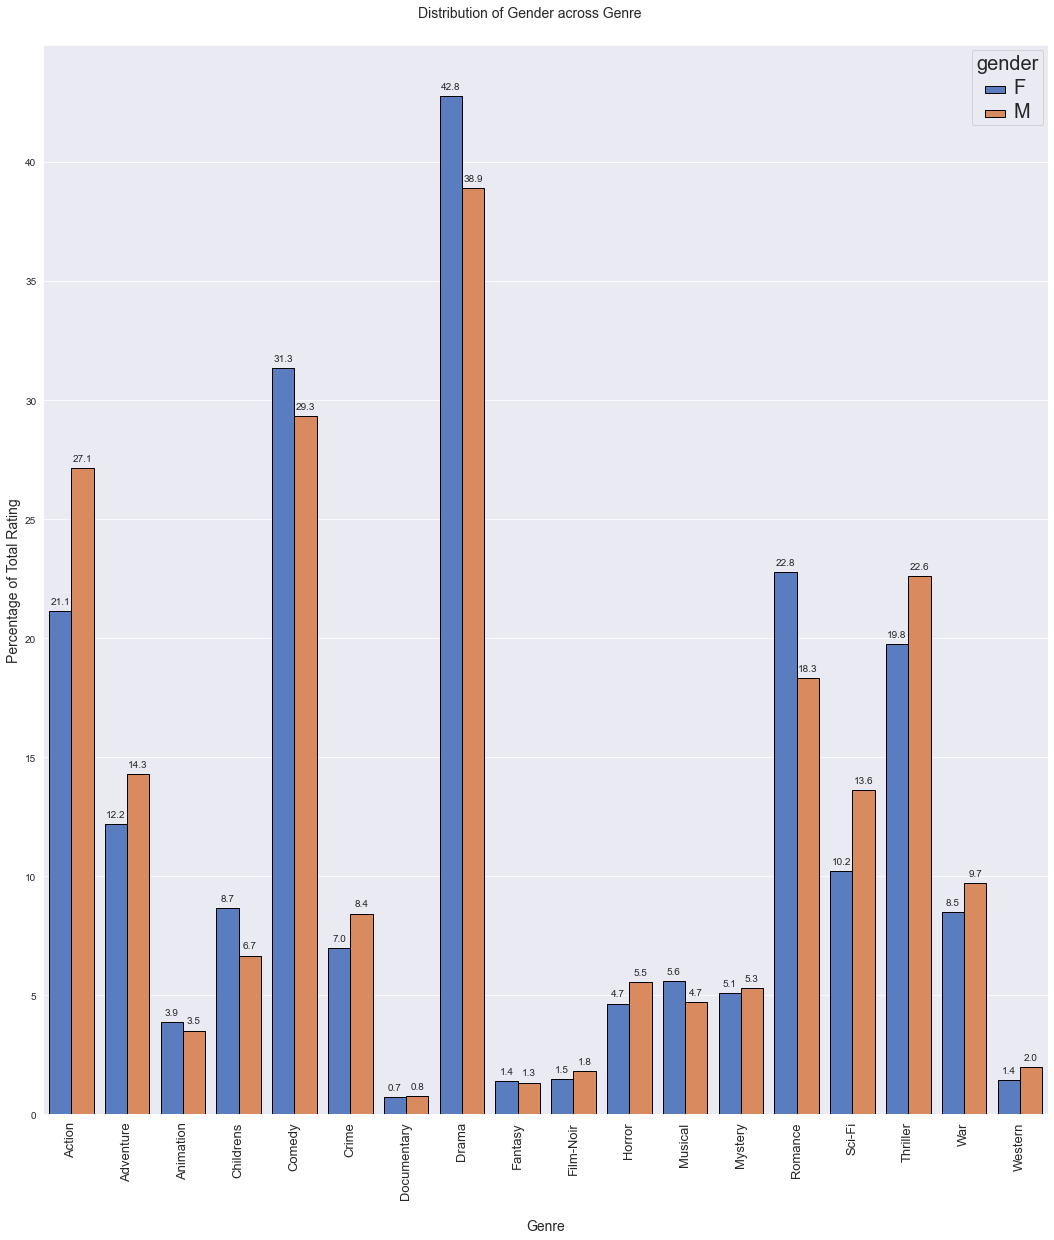

In [16]:
# Get list of genre columns (excluding "unknown")
genre_columns = movies.columns.difference(["movie title", "release date", "unknown"])

# Merge user ratings and movies - on movie id
movie_details_user = movie_user_ratings[["user id", "movie id"]].merge(movies[genre_columns], on="movie id", how="left")

# Drop any rows that dont have movie details after merge
# Use missing_movie_ids from Criteria #9 above
movie_details_user.drop(movie_details_user[movie_details_user["movie id"].isin(missing_movie_ids)].index, inplace=True)

# Merge user and movie details - on user id
movie_details_user_details = movie_details_user.merge(users[["user id", "gender"]], on="user id", how="left")

# Check if there are any missing user id mapping, that might give a null gender
print("\nAny rated movie without user gender?", (movie_details_user_details["gender"].isnull()).any())

# Remove user id which is not required anymore
genre_gender_details = movie_details_user_details.drop(columns=["user id"])

# Group by gender
grouper = genre_gender_details.groupby(["gender"])

# Get sum of all columns
genre_by_gender_sum = grouper.sum()

# Get count of movie id column, to get gender wise total count
genre_by_gender_sum["Total Ratings"] = grouper["movie id"].count()

# Calculate the percentage of rating for each genre (column), using the Total Ratings column
genre_by_gender_percent = genre_by_gender_sum.apply(lambda x: (x / genre_by_gender_sum["Total Ratings"]) * 100).reset_index()

# Remove movie id and Total Ratings, that are not required anymore
genre_by_gender_percent.drop(columns=["movie id", "Total Ratings"], inplace=True)

# Melt the data to convert genre columns to a categorical column, which will make it plot friendly
genre_by_gender_tidy = genre_by_gender_percent.melt(id_vars="gender").rename(columns={"variable":"genre", "value":"percentage"})

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,18), squeeze=False)
# Plot the percentage for each genre as a barplot, for each gender, for a side by side comparison
sns.barplot(x="genre", y="percentage", hue="gender", data=genre_by_gender_tidy, ax=axes[0,0], edgecolor="black")

fig.suptitle("Distribution of Gender across Genre", fontsize=14)
plt.xticks(rotation=90, fontsize=13)
plt.xlabel("Genre", labelpad=20, fontsize=14)
plt.ylabel("Percentage of Total Rating", fontsize=14)

for p in axes[0,0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 0.3
    value = '{:.1f}'.format(p.get_height())
    axes[0,0].text(_x, _y, value, ha="center") 

plt.subplots_adjust(hspace = 0.45, top=0.95)
plt.setp(axes[0,0].get_legend().get_texts(), fontsize='20')
plt.setp(axes[0,0].get_legend().get_title(), fontsize='20')
plt.show();

##### Observation:
Based on the gender distribution across Genres above, we should now be able validate the provided statements:
* **Claim**: *Men watch more drama than women*

 From the graph above, we can see that **42.8%** of Female and **38.9%** of Male watch the *Drama* genre.  
 Based on this evidence, the claim in **incorrect**.<br><br>
* **Claim**: *Women watch more Sci-Fi than men*

 From the graph above, we can see that **10.2%** of Female and **13.6%** of Male watch the *Sci-Fi* genre.  
 Based on this evidence, the claim in **incorrect**.<br><br>
* **Claim**: *Men watch more Romance than women*

 From the graph above, we can see that **22.8%** of Female and **18.3%** of Male watch the *Romance* genre.  
 Based on this evidence, the claim is **incorrect**.<br><br>

<a name="conclusion"></a>
### Conclusion
So, we were able to do some preliminary data analysis using the provided dataset from MovieLens. We do see some interesting trends in terms of how the genres became popular over the years and how preference for genres change between Male and Female audience. A more recent dataset might actually tell us a different story as audience preference in terms of genres might have changed in the last 10-20 years.